In [1]:
# sobel -> horizontal,vertical,diagonal, sum of all these

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from scipy.signal import convolve2d

In [3]:
sobel_kernel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sobel_kernel_y = np.transpose(sobel_kernel_x)
sobel_kernel_diag = np.array([[0,1,2],[-1,0,1],[-2,-1,0]])

In [4]:
image = img.imread('CHP4/ghar.tif')
image

array([[195, 195, 194, ..., 197, 196, 194],
       [193, 193, 192, ..., 195, 197, 197],
       [195, 195, 195, ..., 197, 199, 197],
       ...,
       [114, 114, 115, ...,  61,  61,  81],
       [113, 113, 114, ...,  60,  61,  80],
       [113, 113, 114, ...,  60,  61,  80]], dtype=uint8)

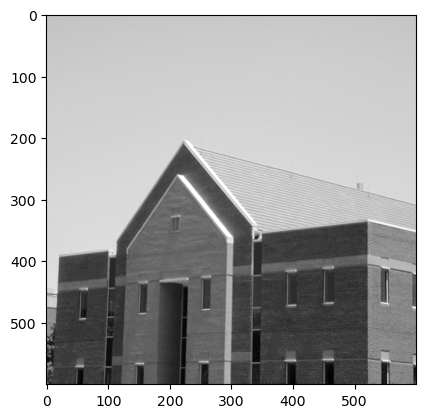

In [5]:
plt.imshow(image,cmap='gray')
plt.show();

In [6]:
image.shape

(600, 600)

In [7]:
# Trying to make image symetriacal with padding 

In [8]:
# def pad_image(image_data,width):
#     difference = (image_data.shape[0] - image_data.shape[1])
#     print(difference,max(image_data.shape[0] , image_data.shape[1]))
#     if difference < 0:
#         difference = abs(difference)
#         new_image = np.pad(image_data,pad_width=(width,abs(difference+width)))
#     else:
#         difference = abs(difference)
#         new_image= np.pad(image_data,pad_width=(difference+width,width))  
    
#     return new_image

In [9]:
# pad_image(image,2).shape

In [10]:
padded_image = np.pad(image,pad_width=(2,2))
padded_image

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0, 195, ..., 194,   0,   0],
       ...,
       [  0,   0, 113, ...,  80,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [11]:
padded_image.shape

(604, 604)

In [12]:
def parts(image,i,j,mask_size):
    return image[i:i+mask_size,j:j+mask_size]

In [13]:
# edges_x = np.zeros(shape=padded_image.shape)
# for i in range(1,len(padded_image)-2):
#     for j in range(1,len(padded_image)-2):
#         edges_x[i][j] = np.sum(parts(image,i,j,mask_size=3) * sobel_kernel_x)

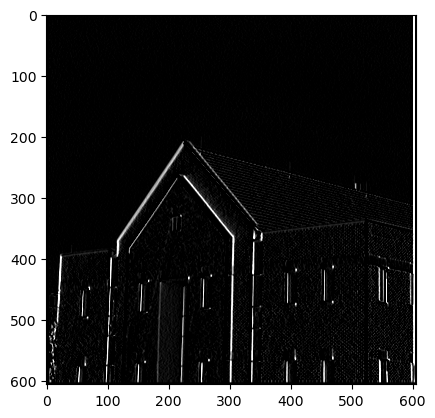

In [14]:
horizontal_edges = convolve2d(padded_image,sobel_kernel_x)
plt.imshow(horizontal_edges,cmap='gray',vmax=255,vmin=0)
plt.show();

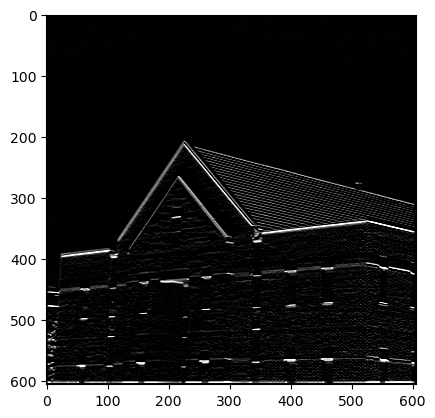

In [15]:
vertical_edges = convolve2d(padded_image,sobel_kernel_y)
plt.imshow(vertical_edges,cmap='gray',vmax=255,vmin=0)
plt.show();

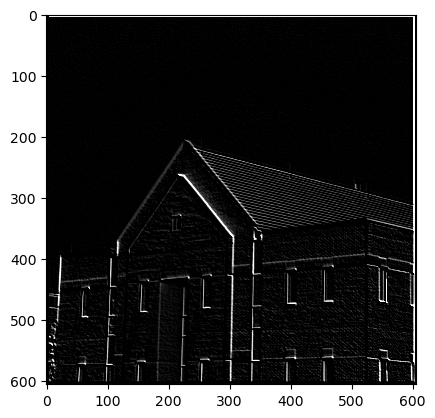

In [16]:
diagonal_edges = convolve2d(padded_image,sobel_kernel_diag)
plt.imshow(diagonal_edges,cmap='gray',vmax=255,vmin=0)
plt.show();

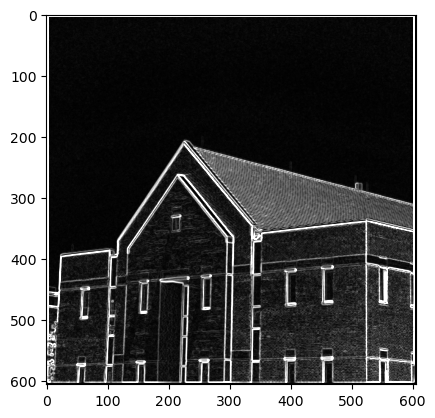

In [19]:
final_edges = np.sqrt(vertical_edges**2 + horizontal_edges**2 )
plt.imshow((final_edges),cmap='gray',vmax=255,vmin=0)
plt.show();

Thus we can observe the effects of edge detection on image , also when we increase the magnitude of the sobel kernels the edges become more defined.